# 의도 분류 모델 학습 데이터 생성하기

## 0. Import

In [1]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 21.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.2/590.2 kB 19.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Komoran
import matplotlib.pyplot as plt

## 1. 데이터 불러오기

In [4]:
emotion_data = pd.read_csv('../../변형데이터/감정분류데이터.csv')
purpose_data = pd.read_csv('../../변형데이터/용도별목적대화데이터.csv')
topic_data = pd.read_csv('../../변형데이터/주제별텍스트일상대화데이터.csv')
add_data = pd.read_csv('../../변형데이터/추가데이터.csv')

emotion_data.dropna(inplace=True)
purpose_data.dropna(inplace=True)
topic_data.dropna(inplace=True)
add_data.dropna(inplace=True)

In [5]:
print(f"emotion_data shape => {emotion_data.shape}\n\
purpose_data shape => {purpose_data.shape}\n\
topic_data shape => {topic_data.shape}\n\
add_data => {add_data.shape}")

emotion_data shape => (11823, 3)
purpose_data shape => (480494, 1)
topic_data shape => (1229866, 1)
add_data => (9216, 2)


In [6]:
emotion_data.columns

Index(['Q', 'A', 'label'], dtype='object')

In [7]:
purpose_data.columns

Index(['text'], dtype='object')

In [8]:
topic_data.columns

Index(['text'], dtype='object')

In [9]:
add_data.columns

Index(['query', 'intent'], dtype='object')

In [16]:
all_data = list(emotion_data['Q']) + list(emotion_data['A']) + list(purpose_data['text']) + list(topic_data['text']) + list(add_data['query'])

In [22]:
len(all_data)

1743222

## 2. 의도 분류 데이터 생성하기
 (0 -> 연락처), (1 -> 장소), (2 -> 일정), (3 -> 학식), (4 -> 기타)

In [23]:
contact = []
place = []
schedule = []
menu = []
etc = []

In [26]:
for i in all_data:
    if ('어디' or '장소' or '위치' or '주소') in i: place.append(i)
    elif ('번호' or '전화' or '연락') in i: contact.append(i)
    elif ('시작' or '마감' or '언제' or '기간' or '시간' or '일정') in i: schedule.append(i)
    elif ('학식' or '밥' or '식당' or '식단' or '메뉴' or'아침' or '점심' or '저녁' or '조식' or '중식' or '석식') in i: menu.append(i)
    else: etc.append(i)

In [27]:
len(contact)

24502

In [30]:
contact_label = []
for _ in range(len(contact)):
    contact_label.append(0)
len(contact_label)

24502

In [31]:
len(place)

37430

In [32]:
place_label = []
for _ in range(len(place)):
    place_label.append(1)
len(place_label)

37430

In [33]:
len(schedule)

11884

In [37]:
schedule_label = []
for _ in range(len(schedule)):
    schedule_label.append(2)
len(schedule_label)

11884

In [35]:
len(menu)

72

In [38]:
menu_label = []
for _ in range(len(menu)):
    menu_label.append(3)
len(menu_label)

72

In [39]:
train_df = pd.DataFrame({'text':contact+place+schedule+menu,'label':contact_label+place_label+schedule_label+menu_label})

In [40]:
train_df.head()

,text,label
0,길에서 번호 따였어,0
1,로또 당첨 번호 불러봐,0
2,로또 당첨 번호를 불러 주세요,0
3,로또 번호 알려줘,0
4,로또 번호 알려줘,0


In [41]:
train_df.tail()

,text,label
73883,너네 학교 학식 맛 없어?,3
73884,대학교 수업 마치고 애들이랑 학식 먹는 로망있었는데...,3
73885,막냇동생 중학교 입학식이 언제,3
73886,삼월달 입학식 언제였지,3
73887,삼월달 입학식 언제인지 알려줘,3


In [42]:
train_df[train_df['label']==0]

,text,label
0,길에서 번호 따였어,0
1,로또 당첨 번호 불러봐,0
2,로또 당첨 번호를 불러 주세요,0
3,로또 번호 알려줘,0
4,로또 번호 알려줘,0
...,...,...
24497,학원에서 어쩌다 보니 어느 여자 번호를 얻었어.,0
24498,방어율 99.9라서 등번호 99로 지었냐,0
24499,다른건 몰라도 주민등록번호 유출한건 처벌 해야한다,0
24500,동영상 찍고 차량 번호 찍고 시간대 찍어서 회사측에 보내도록해 그리고 이런사람은 다...,0


In [43]:
train_df[train_df['label']==1]

,text,label
24502,가족 여행 어디로 가지?,1
24503,가족들이랑 어디 가지?,1
24504,남자 보통 어디서 만나,1
24505,남자 어디서 만나,1
24506,남자친구는 어디서 만나,1
...,...,...
61927,답이 어디있을까? 답은 언제나 내 안에 있죠.,1
61928,어디서부터 어떻게 얘기를 해야할지. 차분히 얘기해봐요. 언제나 여기 있을게요.,1
61929,언제 어디로 튀어서 니 뒷통수 후려칠 지 모른다.,1
61930,언제어디서나 기분 좋게 바라 볼수 있는분!!,1


In [44]:
train_df[train_df['label']==2]

,text,label
61932,공부 시작해도 될까,2
61933,남자친구가 사업 시작한대,2
61934,다른 거 시작 해볼까,2
61935,마음 잡고 다시 시작,2
61936,비 오기 시작하네,2
...,...,...
73811,선배님들은 아이출산하고 언제쯤 생리 시작하셨나요?,2
73812,부정출혈이 있고 난 후 며칠 뒤에 생리 시작하는지 아시는분 있나요...?,2
73813,언제 시작하고 언제 끝났는지,2
73814,며칠전에 머리를 매직하고 나서부터슬슬 여자로서의 자각은 가지고 다니기 시작했는데얼마...,2


In [45]:
train_df[train_df['label']==3]

,text,label
73816,어린이집 입학식 가야겠지,3
73817,어린이집 입학식 꼭 참석해야하나?,3
73818,학식 이제 물린다,3
73819,학식 지겨워,3
73820,그리고 이번에 가을학기 입학식은 꼭 출석해야 하나요,3
...,...,...
73883,너네 학교 학식 맛 없어?,3
73884,대학교 수업 마치고 애들이랑 학식 먹는 로망있었는데...,3
73885,막냇동생 중학교 입학식이 언제,3
73886,삼월달 입학식 언제였지,3


In [46]:
train_df.reset_index(drop=True, inplace=True)

In [47]:
train_df.tail()

,text,label
73883,너네 학교 학식 맛 없어?,3
73884,대학교 수업 마치고 애들이랑 학식 먹는 로망있었는데...,3
73885,막냇동생 중학교 입학식이 언제,3
73886,삼월달 입학식 언제였지,3
73887,삼월달 입학식 언제인지 알려줘,3


In [48]:
train_df.to_csv("train_data.csv", index=False)

## 3. 적절한 패딩 길이 구하기

In [49]:
data = pd.read_csv('train_data.csv')

In [50]:
data.shape

(73888, 2)

In [51]:
tokenizer = Komoran()

In [52]:
data_tokenized = [[token+"/"+POS for token, POS in tokenizer.pos(text_)] for text_ in data['text']]

exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            'JX', 'JC',
            'SF', 'SP', 'SS', 'SE', 'SO',
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            'XSN', 'XSV', 'XSA'
]

f = lambda x: x in exclusion_tags

data_list = []
for i in range(len(data_tokenized)):
        temp = []
        for j in range(len(data_tokenized[i])):
            if f(data_tokenized[i][j].split('/')[1]) is False:
                temp.append(data_tokenized[i][j].split('/')[0])
        data_list.append(temp)

In [53]:
num_tokens = [len(tokens) for tokens in data_list]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

토큰 길이 평균: 7.6069727154612385
토큰 길이 최대: 69
토큰 길이 표준편차: 4.201221374683753


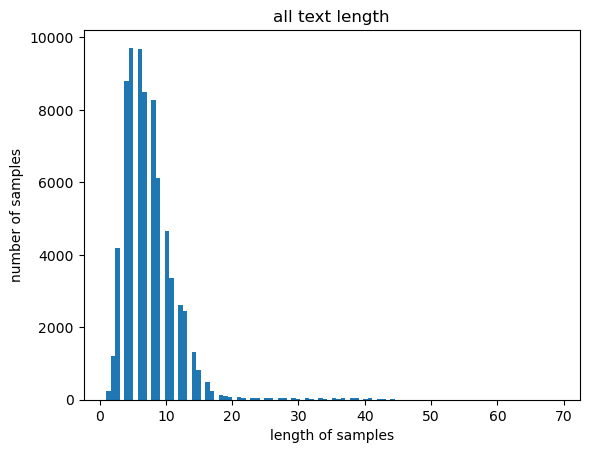

In [54]:
plt.title('all text length')
plt.hist(num_tokens, bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [55]:
select_length = 25

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
    
below_threshold_len(select_length, data_list)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 0.9912299696838458
